In [1]:
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #data visualization
import seaborn as sns

import timeit # time measure

import sklearn # modeling

import warnings
warnings.filterwarnings("ignore")

import sys

print ('Python version ->', sys.version)
print ('Numpy version ->', np.__version__)
print ('Pandas version ->', pd.__version__)
print ('Sklearn version ->', sklearn.__version__)

Python version -> 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
Numpy version -> 1.16.0
Pandas version -> 0.24.0
Sklearn version -> 0.19.2


# 1. Data set 불러오기

In [2]:
train_df = pd.read_csv('train.csv') # training dataframe
test_df = pd.read_csv('test.csv') # testing dataframe

In [3]:
#원본데이터는 보존하기 위함
train = train_df.copy()
test = test_df.copy()

In [4]:
print("train.csv. Shape: ",train.shape)
print("test.csv. Shape: ",test.shape)

train.csv. Shape:  (1216553, 13)
test.csv. Shape:  (5463, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
transaction_id            1216553 non-null int64
apartment_id              1216553 non-null int64
city                      1216553 non-null object
dong                      1216553 non-null object
jibun                     1216553 non-null object
apt                       1216553 non-null object
addr_kr                   1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_date          1216553 non-null object
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
transaction_id            5463 non-null int64
apartment_id              5463 non-null int64
city                      5463 non-null object
dong                      5463 non-null object
jibun                     5463 non-null object
apt                       5463 non-null object
addr_kr                   5463 non-null object
exclusive_use_area        5463 non-null float64
year_of_completion        5463 non-null int64
transaction_year_month    5463 non-null int64
transaction_date          5463 non-null object
floor                     5463 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 512.2+ KB


#### Train Column name Description

* transaction_id : 아파트 거래에 대한 유니크한 아이디
* apartment_id : 아파트 아이디
* city : 도시
* dong : 동
* jibun : 지번
* apt : 아파트단지 이름
* addr_kr : 주소
* exclusive_use_area : 전용면적
* year_of_completion : 설립일자
* transaction_year_month : 거래년월
* transaction_date	: 거래날짜
* floor : 층
* transaction_real_price : 실거래가 (target variable)

In [7]:
train_null = train.drop('transaction_real_price', axis = 1).isnull().sum()/len(train)*100
test_null = test.isnull().sum()/len(test)*100
pd.DataFrame({'train_null_count' : train_null, 'test_null_count' : test_null})

,train_null_count,test_null_count
transaction_id,0.0,0.0
apartment_id,0.0,0.0
city,0.0,0.0
dong,0.0,0.0
jibun,0.0,0.0
apt,0.0,0.0
addr_kr,0.0,0.0
exclusive_use_area,0.0,0.0
year_of_completion,0.0,0.0
transaction_year_month,0.0,0.0


In [8]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


# 2. Exploratory Data Analysis AND Processing

## 2.1 Target Variable (Dependent Variable)

## transaction_real_price : 실거래가

In [10]:
train['transaction_real_price'].describe()

count    1.216553e+06
mean     3.822769e+04
std      3.104898e+04
min      1.000000e+02
25%      1.900000e+04
50%      3.090000e+04
75%      4.700000e+04
max      8.200000e+05
Name: transaction_real_price, dtype: float64

* 총 1216553개의 데이터, 약 120만개
* 평균 : 38227.69
* 표준편차 : 31048.98
* min : 100
* max : 820000, 82만

transaction_real_price -> Skewness: 3.407169, Kurtosis: 24.839821


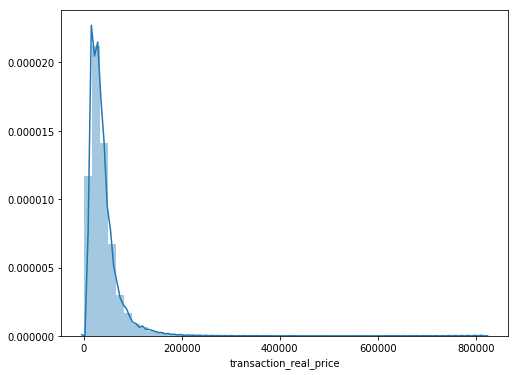

In [11]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['transaction_real_price'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('transaction_real_price',train['transaction_real_price'].skew(), 
                                                     train['transaction_real_price'].kurt()))

* 왜도(Skewness) : 왼쪽으로 치우쳐져 있을수록 값이크고, 오른쪽으로 치우쳐져 있을 수록 값이 작아진다. 즉, 0에 가까울수록 좋은 형태
* 첨도(Kurtosis) : 첨도 값이 3에 가까울 경우 정규분포에 가까우며, 첨도 값이 클수록 뾰족하고 값이 작을 수록 완만해진다

In [12]:
train['transaction_real_price'] = np.log1p(train['transaction_real_price'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('transaction_real_price',train['transaction_real_price'].skew(), 
                                                     train['transaction_real_price'].kurt()))

transaction_real_price -> Skewness: -0.094932, Kurtosis: 0.248866


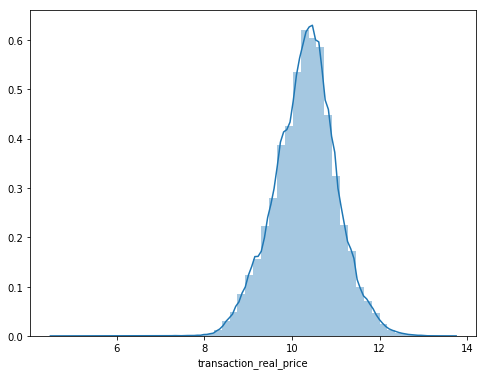

In [13]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['transaction_real_price'])

### columns 상관관계

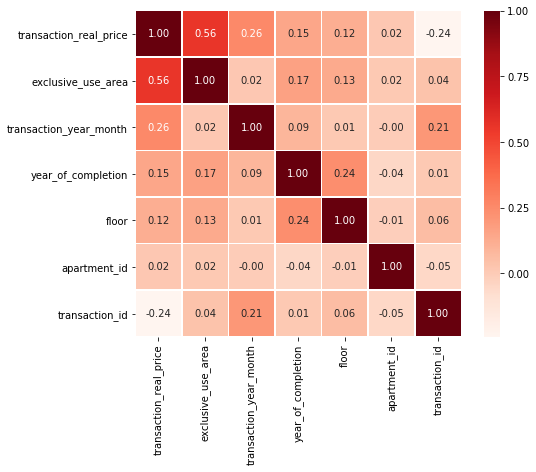

In [14]:
#상관관계 확인
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

## 2.2 Numeric Variable

## transaction_id & apartment_id : 거래 id & 아파트 id

In [15]:
len(train['apartment_id'].unique())

12533

transaction_id는 예측을 하는 데 필요없고, apartment_id는 unique로 갯수를 확인해 보니 12533개로 겹치는 부분이 상당히 많은 것을 알 수 있습니다.

transaction_id가 순서가 섞여있지만, 나중에 문제될 것이 없습니다.

따라서, transaction_id는 삭제를 하고, apartment_id는 그대로 놔두겠습니다.

In [16]:
train_id = train['transaction_id']
train = train.drop('transaction_id', axis=1)
test_id = test['transaction_id']
test = test.drop('transaction_id', axis=1)

## floor : 층

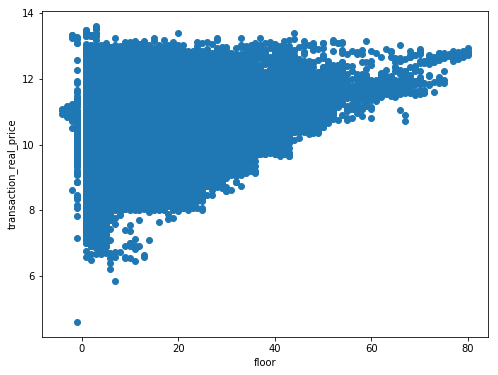

In [17]:
#약 100만개의 데이터라 sns.regplot 사용 시 엄청 오래걸림...
f, ax = plt.subplots(figsize = (8,6))
plt.scatter(train['floor'], train['transaction_real_price'])
plt.xlabel('floor')
plt.ylabel('transaction_real_price')
plt.show()

floor -> Skewness: 1.324710, Kurtosis: 3.796603


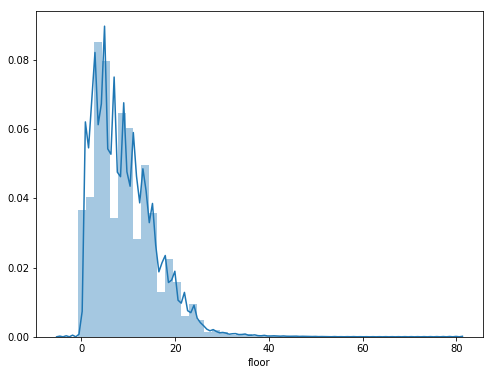

In [19]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['floor'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('floor',train['floor'].skew(), 
                                                     train['floor'].kurt()))

대부분의 데이터는 다른데이터와 비교하기 위해 왜도, 첨도 조정은 마지막에 한다.

## exclusive_use_area : 전용 면적

In [20]:
train['exclusive_use_area'].describe()

count    1.216553e+06
mean     7.816549e+01
std      2.915113e+01
min      9.260000e+00
25%      5.976000e+01
50%      8.241000e+01
75%      8.497000e+01
max      4.243200e+02
Name: exclusive_use_area, dtype: float64

* 평균 : 78.16549
* 표준편차 : 29.15113
* min : 9.26
* max : 424.32

float형식으로 나타나있음. 면적의 단위는 m^2

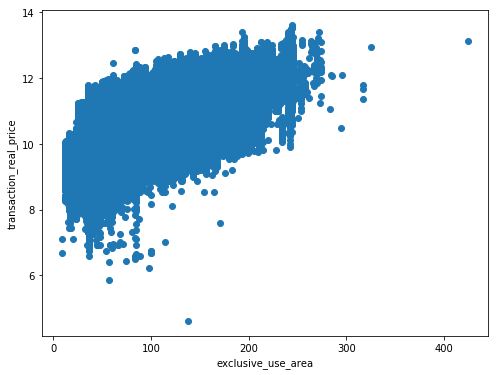

In [21]:
#약 100만개의 데이터라 sns.regplot 사용 시 엄청 오래걸림...
f, ax = plt.subplots(figsize = (8,6))
plt.scatter(train['exclusive_use_area'], train['transaction_real_price'])
plt.xlabel('exclusive_use_area')
plt.ylabel('transaction_real_price')
plt.show()

많이 벗어나 보이는 이상치들을 탐색해보겠습니다.

In [22]:
train[train['exclusive_use_area']>400]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
563870,12633,서울특별시,도곡동,193-1,힐데스하임빌라,도곡동 193-1 힐데스하임빌라,424.32,1998,201604,11~20,10,13.118357


In [23]:
train[(train['exclusive_use_area']<150)&(train['transaction_real_price']<6)]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
312119,10853,서울특별시,신월동,128,태헌(신월프라자),신월동 128 태헌(신월프라자),56.97,1999,201005,21~31,7,5.860786
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121


딱히 이상이 없어 보임

exclusive_use_area -> Skewness: 1.227509, Kurtosis: 3.100517


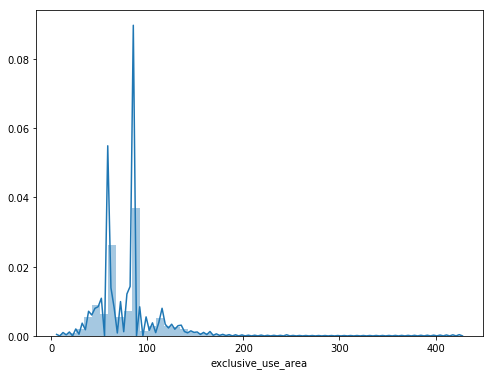

In [24]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['exclusive_use_area'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('exclusive_use_area',train['exclusive_use_area'].skew(), 
                                                     train['exclusive_use_area'].kurt()))

## transaction_year_month : 거래 년, 월

In [25]:
train_test_data = [train, test]

for dataset in train_test_data:
    #date -> 년, 월 단위로 새로운 칼럼 만듦
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(str)
    dataset['year'] = dataset['transaction_year_month'].str[:4].astype(int)
    dataset['month'] = dataset['transaction_year_month'].str[4:6].astype(int)
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(int)

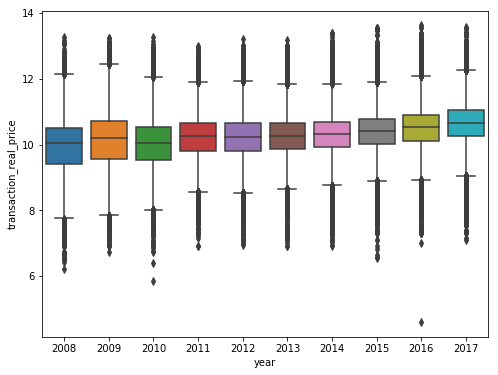

In [26]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['year'], train['transaction_real_price'])
plt.show()

In [27]:
train[(train['year']==2016) & (train['transaction_real_price']<6)]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121,2016,6


서면아파트가 왜이렇게 값이 낮을까 다른 아파트는 어떨지..

In [28]:
train[train['apt']=='서면']

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
695725,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201105,21~31,3,8.682877,2011,5
696834,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201108,21~31,1,8.922792,2011,8
700884,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,88.93,1974,201206,1~10,1,10.126671,2012,6
702589,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201212,21~31,5,8.699681,2012,12
702876,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201301,11~20,4,8.909370,2013,1
703979,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201304,1~10,1,8.853808,2013,4
711024,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201407,21~31,5,8.853808,2014,7
712441,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201410,21~31,3,9.082621,2014,10
713864,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201501,1~10,4,8.955577,2015,1
721684,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201604,1~10,1,9.059634,2016,4


floor가 -1인 경우 가격이 현저히 낮음, 다른 -1층은?

In [29]:
train[train['floor']==-1].sort_values('transaction_real_price')

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.250,1974,201606,21~30,-1,4.615121,2016,6
651052,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,200809,21~30,-1,7.170888,2008,9
651087,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.890,1996,200810,11~20,-1,7.824446,2008,10
651641,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,201101,21~31,-1,8.071219,2011,1
674249,9764,부산광역시,동삼동,213-19,조은아크로빌,동삼동 213-19 조은아크로빌,46.800,2001,201506,11~20,-1,8.160804,2015,6
652044,1516,부산광역시,대청동4가,75-167,근영빌라4동,대청동4가 75-167 근영빌라4동,46.650,1996,201211,1~10,-1,8.343078,2012,11
664479,1853,부산광역시,초량동,89-6,남도,초량동 89-6 남도,76.530,1975,201606,21~30,-1,8.366603,2016,6
9602,9058,서울특별시,신당동,432-1970,유정,신당동 432-1970 유정,29.400,2001,201502,11~20,-1,8.412055,2015,2
267272,1269,서울특별시,홍은동,277-145,교수(A),홍은동 277-145 교수(A),100.440,2006,201012,1~10,-1,8.434029,2010,12
698094,7163,부산광역시,개금동,627-1,시영,개금동 627-1 시영,39.670,1975,201110,1~10,-1,8.434029,2011,10


-1 치고 가격이 높은 경우도 있음

같은 아파트에서는 floor가 -1인 경우의 영향을 확인해봄

In [30]:
train[train['apt']=='근영빌라1동'].sort_values('floor')

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
651087,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.89,1996,200810,11~20,-1,7.824446,2008,10
651599,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,54.73,1996,201011,1~10,1,8.216358,2010,11
652009,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,51.83,1996,201210,21~31,5,8.824825,2012,10
652591,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.89,1996,201508,1~10,5,9.169623,2015,8


대충확인했을 때 아파트에 따라 다름.

따라서, 이상치라고 판단하기 어려워 삭제하지 않는다.

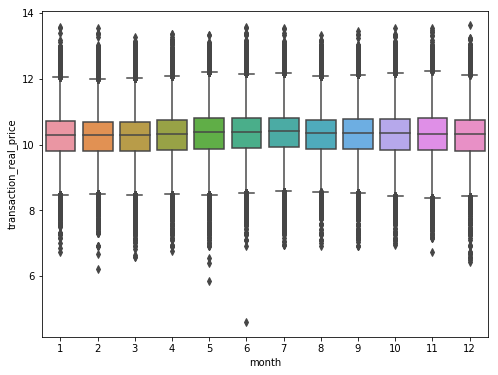

In [31]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['month'], train['transaction_real_price'])
plt.show()

## year_of_completion : 설립일자

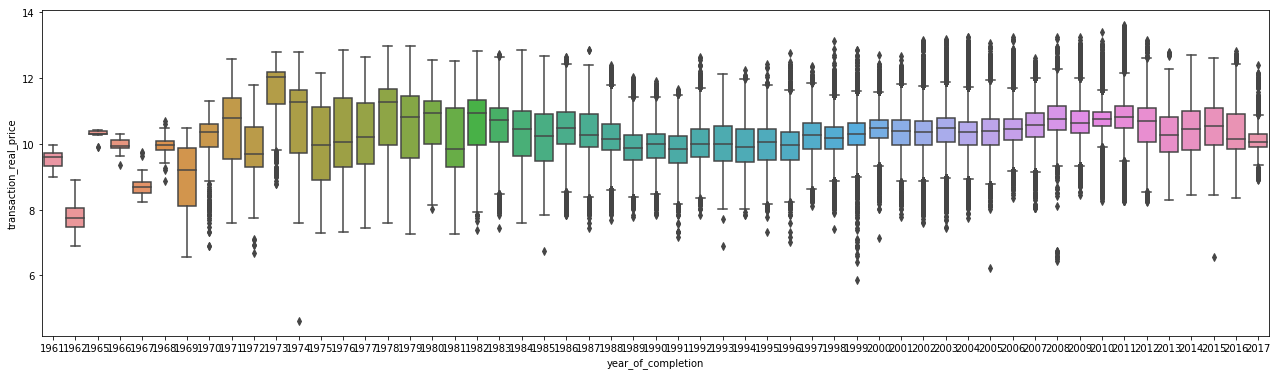

In [32]:
f, ax = plt.subplots(figsize = (22,6))
sns.boxplot(train['year_of_completion'], train['transaction_real_price'])
plt.show()

이상치를 찾을 수 ㅇ벗..

## 2.3 Catergorical Variable

## city : 도시

In [33]:
replace_name = {'서울특별시' : 0, '부산광역시' : 1 }
train = train.replace({'city' : replace_name})
test = test.replace({'city' : replace_name})

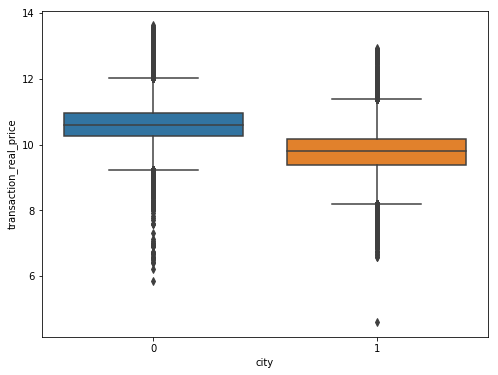

In [34]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['city'], train['transaction_real_price'])
plt.show()

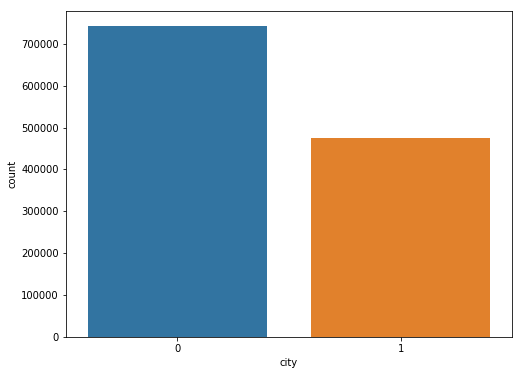

In [35]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(train['city'])
plt.show()

## addr_kr : 주소

동, 지번, 아파트단지이름을 합친 것을 addr_kr로 하였으므로 그냥 삭제 하겠습니다.

In [36]:
train = train.drop('addr_kr', axis=1)
test = test.drop('addr_kr', axis=1)

## dong

데이콘 튜토리얼 샘플코드에서 한강의 유무에 따른 feature를 하나 생성 해준다.

In [39]:
train['hangang']=train['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)
test['hangang']=test['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)

In [37]:
len(train['dong'].unique())

473

dong은 그 지역을 그룹화 한 것으로 지역에 따라 가격차이를 보여줄 수 있으므로,

아파트 실거래가의 평균순으로 데이터를 labeling 한다.

In [38]:
train_dong = train[['transaction_real_price','dong']].groupby('dong').mean().sort_values('transaction_real_price').reset_index()
train_dong.head()

,dong,transaction_real_price
0,신선동3가,8.543619
1,봉래동5가,8.590871
2,장안읍 명례리,8.597728
3,신창동2가,8.601466
4,신선동2가,8.622581


In [40]:
dong_num = {}
for i in range(len(train_dong)):
    dong = train_dong['dong'].iloc[i]
    dong_num[dong] = i
    
dong_num

{'신선동3가': 0,
 '봉래동5가': 1,
 '장안읍 명례리': 2,
 '신창동2가': 3,
 '신선동2가': 4,
 '보수동1가': 5,
 '장충동2가': 6,
 '중앙동4가': 7,
 '부평동2가': 8,
 '수정동': 9,
 '필동1가': 10,
 '아미동2가': 11,
 '동광동5가': 12,
 '기장읍 대변리': 13,
 '초장동': 14,
 '남항동3가': 15,
 '대청동1가': 16,
 '기장읍 서부리': 17,
 '동삼동': 18,
 '반송동': 19,
 '보수동2가': 20,
 '누상동': 21,
 '봉래동3가': 22,
 '대청동4가': 23,
 '서동': 24,
 '일광면 이천리': 25,
 '덕천동': 26,
 '일광면 삼성리': 27,
 '봉래동4가': 28,
 '감만동': 29,
 '영등포동3가': 30,
 '모라동': 31,
 '행촌동': 32,
 '동대신동3가': 33,
 '학장동': 34,
 '구평동': 35,
 '좌천동': 36,
 '금곡동': 37,
 '영주동': 38,
 '장림동': 39,
 '토성동2가': 40,
 '기장읍 청강리': 41,
 '기장읍 대라리': 42,
 '영등포동1가': 43,
 '영등포동2가': 44,
 '미근동': 45,
 '감천동': 46,
 '감전동': 47,
 '전포동': 48,
 '금사동': 49,
 '기장읍 동부리': 50,
 '칠산동': 51,
 '덕포동': 52,
 '초량동': 53,
 '명장동': 54,
 '다대동': 55,
 '서대신동1가': 56,
 '오장동': 57,
 '기장읍 교리': 58,
 '대창동1가': 59,
 '영등포동4가': 60,
 '회동동': 61,
 '신평동': 62,
 '범천동': 63,
 '우암동': 64,
 '구포동': 65,
 '괴정동': 66,
 '당감동': 67,
 '안암동4가': 68,
 '토성동5가': 69,
 '개금동': 70,
 '남산동': 71,
 '당리동': 72,
 '당산동6가': 73,
 '주례동': 74,
 '통인동': 75,
 '청

In [41]:
train = train.replace({'dong' : dong_num})
test = test.replace({'dong' : dong_num})
train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang
0,7622,0,351,6-13,신현(101동),84.82,2002,200801,21~31,2,10.532123,2008,1,0
1,5399,0,414,142,사직파크맨션,99.17,1973,200801,1~10,6,9.903538,2008,1,0
2,3578,0,414,174-1,두레엘리시안,84.74,2007,200801,1~10,6,10.558439,2008,1,0
3,10957,0,462,95,파크팰리스,146.39,2003,200801,11~20,15,11.678448,2008,1,0
4,10639,0,462,110-15,킹스매너,194.43,2004,200801,21~31,3,11.695255,2008,1,0


## Jibun

In [62]:
len(train['jibun'].unique())

8961

In [63]:
train_jibun = train[['transaction_real_price','jibun']].groupby('jibun').mean().sort_values('transaction_real_price').reset_index()
train_jibun.head()

,jibun,transaction_real_price
0,산3-148,7.225286
1,737-1,7.494417
2,741-1,7.498174
3,1181-4,7.585491
4,11-174,7.601402


## apt

In [42]:
len(train['apt'].unique())

10440

In [43]:
train_apt = train[['transaction_real_price','apt']].groupby('apt').mean().sort_values('transaction_real_price').reset_index()
train_apt.head()

,apt,transaction_real_price
0,좌천시민(737-1),7.494417
1,좌천시민(741-1),7.498174
2,수정(1181-4),7.585491
3,수정(1175-1),7.626830
4,수정(1186-1),7.685623


지번과 아파트 데이터는 unique가 많으므로 따로 labeling을 하지 않는다.

## transaction_date

transaction_date는 거래기간으로 처음 거래시작한 day와 거래가 끝난 day의 차이를 컬럼으로 만들어 주겠습니다.

In [44]:
train['day_diff'] = train['transaction_date'].str.extract('(~\d+)')[0].str[1:].astype(int) - train['transaction_date'].str.extract('(\d+~)')[0].str[:-1].astype(int)
test['day_diff'] = test['transaction_date'].str.extract('(~\d+)')[0].str[1:].astype(int) - test['transaction_date'].str.extract('(\d+~)')[0].str[:-1].astype(int)

In [45]:
len(train['transaction_date'].unique())

6

거래기간 feature도 unique 갯수가 몇개 없기 때문에 labeling을 하겠습니다.

In [46]:
train_date = train[['transaction_real_price','transaction_date']].groupby('transaction_date').mean().sort_values('transaction_real_price').reset_index()
train_date.head()

,transaction_date,transaction_real_price
0,21~29,10.176453
1,21~28,10.286294
2,1~10,10.293390
3,11~20,10.306731
4,21~31,10.318796


In [47]:
date_num = {}
for i in range(len(train_date)):
    date = train_date['transaction_date'].iloc[i]
    date_num[date] = i
    
date_num

{'21~29': 0, '21~28': 1, '1~10': 2, '11~20': 3, '21~31': 4, '21~30': 5}

In [48]:
train = train.replace({'transaction_date' : date_num})
test = test.replace({'transaction_date' : date_num})
train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang,day_diff
0,7622,0,351,6-13,신현(101동),84.82,2002,200801,4,2,10.532123,2008,1,0,10
1,5399,0,414,142,사직파크맨션,99.17,1973,200801,2,6,9.903538,2008,1,0,9
2,3578,0,414,174-1,두레엘리시안,84.74,2007,200801,2,6,10.558439,2008,1,0,9
3,10957,0,462,95,파크팰리스,146.39,2003,200801,3,15,11.678448,2008,1,0,9
4,10639,0,462,110-15,킹스매너,194.43,2004,200801,4,3,11.695255,2008,1,0,10


## 2.4 Preprocessing

floor 같은 경우 -값이 존재하기 때문에 log를 취하기 전에 각 값에 +5를 하면서 모든 값을 양수로 만들어줍니다.

floor -> Skewness: 0.089636, Kurtosis: -0.640885


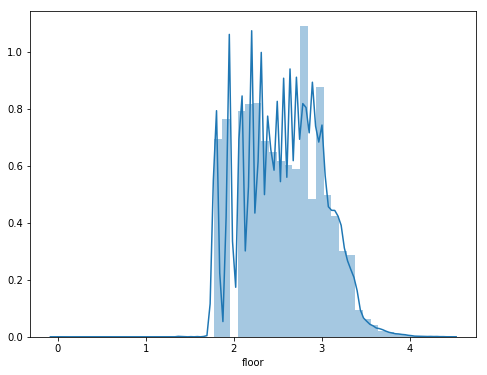

In [49]:
train['floor'] = np.log(train['floor']+5)
test['floor'] = np.log(test['floor']+5)
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['floor'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('floor',train['floor'].skew(), 
                                                     train['floor'].kurt()))

In [50]:
drop_columns = ['apt', 'jibun', 'transaction_year_month']

train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [51]:
train.head()

,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_date,floor,transaction_real_price,year,month,hangang,day_diff
0,7622,0,351,84.82,2002,4,1.945910,10.532123,2008,1,0,10
1,5399,0,414,99.17,1973,2,2.397895,9.903538,2008,1,0,9
2,3578,0,414,84.74,2007,2,2.397895,10.558439,2008,1,0,9
3,10957,0,462,146.39,2003,3,2.995732,11.678448,2008,1,0,9
4,10639,0,462,194.43,2004,4,2.079442,11.695255,2008,1,0,10


# 3. Feature Engineering

In [52]:
train_test_data = [train, test]

for dataset in train_test_data:
    # 거래하는 기간까지의 아파트 나이를 feature 생성
    dataset['age'] = dataset['year'] - dataset['year_of_completion']
    # 샘플코드에 있는 아파트의 재건추 유무를 판단하는 feature 생성
    dataset['is_rebuild']=(dataset['age']>=30).astype(int)

In [53]:
train_columns = []
for column in train.columns[:]:
    if train[column].skew() >= 1:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), 
                                                 train[column].kurt()))
        train_columns.append(column)
    elif train[column].kurt() >= 3:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), 
                                                 train[column].kurt()))
        train_columns.append(column)

exclusive_use_area -> Skewness: 1.227509, Kurtosis: 3.100517
hangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -0.589751, Kurtosis: 4.573129
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


In [54]:
#정규분포모형을 가질 수 있도록 첨도와 왜도를 조정
#조정하는 방법에는 square root, quarter root, log 등이 있다.
#log에서 0의 값이 들어왔을 때 무한으로 가는 것을 방지하도록 1 더해주는 log1p를 사용

for column in train_columns :
    train[column] = np.log1p(train[column])
    test[column] = np.log1p(test[column])
    print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), 
                                                 train[column].kurt()))

exclusive_use_area -> Skewness: -0.438156, Kurtosis: 1.744119
hangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -1.128137, Kurtosis: 6.788569
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


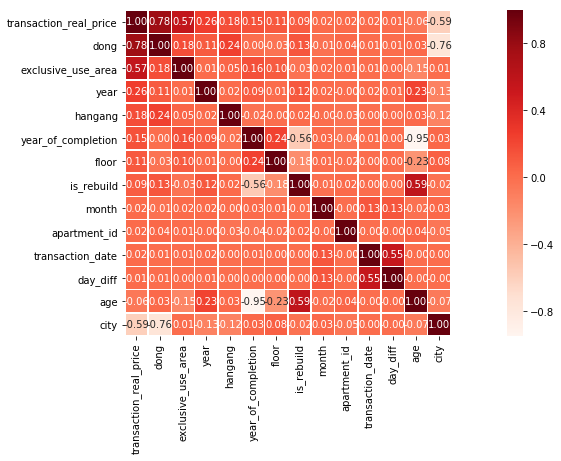

In [55]:
#상관관계 확인
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

# 4. Modeling

In [56]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [57]:
target = train['transaction_real_price']
del train['transaction_real_price']

In [58]:
#cross validation score
n_folds = 2

def cv_score(models):
    kfold = KFold(n_splits=n_folds, shuffle=True ,random_state=42).get_n_splits(train.values)
    for m in models:
        cvs = np.mean(cross_val_score(m['model'], train.values, target, cv=kfold))
        rmse = np.mean(np.sqrt(-cross_val_score(m['model'], train.values, np.expm1(target), scoring = "neg_mean_squared_error", cv = kfold)))
        print("Model {} CV score : {:.4f}".format(m['name'], cvs))
        print("RMSE : {:.4f}".format(rmse))

In [59]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=42))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
gboost = GradientBoostingRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state=42)
xgboost = xgb.XGBRegressor(random_state=42)
lightgbm = lgb.LGBMRegressor(random_state=42, num_leaves = 100, min_data_in_leaf = 15, max_depth=6,
                            learning_rate = 0.1, min_child_samples = 30, feature_fraction=0.9, bagging_freq= 1,
                            bagging_fraction = 0.9, bagging_seed = 11, lambda_l1 = 0.1, verbosity = -1 )

models = [{'model': gboost, 'name':'GradientBoosting'}, {'model': xgboost, 'name':'XGBoost'},
          {'model': lightgbm, 'name':'LightGBM'}, {'model' : lasso, 'name' : 'LASSO Regression'}, 
          {'model' : ENet, 'name' : 'Elastic Net Regression'}, {'model' : forest, 'name' : 'RandomForset'}]

In [60]:
start = timeit.default_timer()
cv_score(models)
stop = timeit.default_timer()
print('불러오는데 걸린 시간 : {}초'.format(stop - start))

Model GradientBoosting CV score : 0.5810
RMSE : 15811.1309
Model XGBoost CV score : 0.5947
RMSE : 15868.0485
Model LightGBM CV score : 0.6131
RMSE : 14330.6681
Model LASSO Regression CV score : 0.6842
RMSE : 19852.5360
Model Elastic Net Regression CV score : 0.6841
RMSE : 19848.9725
Model RandomForset CV score : 0.5618
RMSE : 15087.6387
불러오는데 걸린 시간 : 1061.5614063540002초


In [62]:
#여러개의 모델로 만들어진 predict 데이터들의 평균을 구한다.

models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'},
         {'model':forest, 'name' : 'RandomForest'}]

def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([m['model'].predict(sub_x.values) for m in models])
    return predictions

xgboost, lightgbm, forest 총 3개의 모델을 stacking하여 활용

In [63]:
start = timeit.default_timer()

y_test_pred = AveragingBlending(models, train, target, test)
y_test_pred = (y_test_pred[:, 0]*0.05 + y_test_pred[:, 1]*0.1 + y_test_pred[:, 2]*0.85)
predictions = y_test_pred

stop = timeit.default_timer()
print('불러오는데 걸린 시간 : {}초'.format(stop - start))

불러오는데 걸린 시간 : 294.5215947790002초


In [64]:
sub = pd.read_csv('submission.csv')

In [66]:
sub['transaction_real_price'] = np.expm1(predictions)

In [67]:
sub.to_csv('submission.csv', index=False)